Charger les variables :

In [49]:
%store -r RG_NAME BLOB_NAME BLOB_LOCATION BLOB_SKU CONTAINER_NAME

Création du compte de stockage :

In [ ]:
!az storage account create \
    --name $BLOB_NAME \
    --resource-group $RG_NAME \
    --location $BLOB_LOCATION \
    --sku $BLOB_SKU \
    --query "name" -o tsv

Vérifier si le compte de stockage a été créé :

In [47]:
!az storage account show --name $BLOB_NAME --resource-group $RG_NAME --query "provisioningState" -o tsv

Succeeded


Extraction des clés du blob storage dans le fichier .env :

In [42]:
%%bash -s "$RG_NAME" "$BLOB_NAME"

KEYS=$(az storage account keys list -g "$1" -n "$2" --query "[].value" -o tsv)

# Extraire la première et la deuxième clé
KEY1=$(echo "$KEYS" | head -n1)
KEY2=$(echo "$KEYS" | tail -n1)

{
    echo "BLOB_KEY_1=\"$KEY1\""
    echo "BLOB_KEY_2=\"$KEY2\""
    echo ""
} >> .env

Créer le  conteneur  :

In [54]:
%%bash -s $BLOB_NAME $CONTAINER_NAME

source .env 

az storage container create \
    --account-name "$1" \
    --name "s2" \
    --account-key $BLOB_KEY_1

{
  "created": true
}


Charles fichiers du dossier students vers le blob storage :

In [55]:
%%bash -s $BLOB_NAME $CONTAINER_NAME

source .env

az storage blob upload-batch \
    --account-name "$1" \
    --account-key "$BLOB_KEY_1" \
    --destination "$2" \
    --source "DATA/Blob_Storage/Students" \
    --pattern "*" \
    --query "[].name" -o tsv

Finished[#############################################################]  100.0000%


Vérifier en affichant une photo :

In [74]:
%%bash -s $BLOB_NAME $CONTAINER_NAME
source .env

az storage blob download --account-name "$1" --container-name "$2" --account-key "$BLOB_KEY_1" \
    --name "1058BE5A-F2F1-4A74-92E8-CEC56A8B3732.png" \
    --file "temp.png" \
    --output none

Finished[#############################################################]  100.0000%


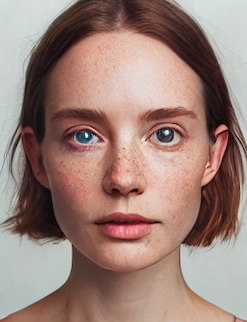

In [75]:
from IPython.display import Image
Image("temp.png")